In [1]:
#Import the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#Load the dataset

animal_train=pd.read_csv("train.csv")
animal_test=pd.read_csv("test.csv")

In [3]:
#Read the dataset
animal_train.head(3)

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner


In [4]:
animal_test.head(3)

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number
0,A723133,2013,3,3 years,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,...,1095,3.000000,"(2.5, 5.0]",01-04-2016 16:19,4,2016,2016-04,Friday,16,1
1,A723134,2016,2,4 weeks,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,...,60,0.164384,"(-0.025, 2.5]",30-04-2016 17:42,4,2016,2016-04,Saturday,17,1
2,A723135,2016,2,4 weeks,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Male,...,60,0.164384,"(-0.025, 2.5]",29-04-2016 00:00,4,2016,2016-04,Friday,0,1


In [5]:
animal_train.dtypes

animal_id_outcome              object
dob_year                        int64
dob_month                       int64
age_upon_intake                object
animal_type                    object
breed                          object
color                          object
intake_condition               object
intake_type                    object
sex_upon_intake                object
count                           int64
age_upon_intake_(days)          int64
age_upon_intake_(years)       float64
age_upon_intake_age_group      object
intake_datetime                object
intake_month                    int64
intake_year                     int64
intake_monthyear               object
intake_weekday                 object
intake_hour                     int64
intake_number                 float64
time_in_shelter                object
time_in_shelter_days          float64
age_upon_outcome               object
date_of_birth                  object
sex_upon_outcome               object
age_upon_out

In [6]:
animal_train.shape

(47803, 37)

In [7]:
animal_train.isnull().sum()

animal_id_outcome                0
dob_year                         0
dob_month                        0
age_upon_intake                  0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
count                            0
age_upon_intake_(days)           0
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_datetime                  0
intake_month                     0
intake_year                      0
intake_monthyear                 0
intake_weekday                   0
intake_hour                      0
intake_number                    0
time_in_shelter                  0
time_in_shelter_days             0
age_upon_outcome                 0
date_of_birth                    0
sex_upon_outcome                 1
age_upon_outcome_(days)          0
age_upon_outcome_(years)         0
age_upon_outcome_age

Here, we can see that the datetime column has 9619 null values, but we don't have to worry about it because, we have the entire information about the outcome such as month, year, weekdat, hour etc in the subsequent columns. Therefore, we will delete the column datetime

In [8]:
#Drop the attribute datetime

animal_train.drop("outcome_datetime", axis = 1, inplace = True)

In [9]:
animal_train.shape

(47803, 36)

In [10]:
animal_train.isnull().sum()

animal_id_outcome             0
dob_year                      0
dob_month                     0
age_upon_intake               0
animal_type                   0
breed                         0
color                         0
intake_condition              0
intake_type                   0
sex_upon_intake               1
count                         0
age_upon_intake_(days)        0
age_upon_intake_(years)       0
age_upon_intake_age_group     0
intake_datetime               0
intake_month                  0
intake_year                   0
intake_monthyear              0
intake_weekday                0
intake_hour                   0
intake_number                 0
time_in_shelter               0
time_in_shelter_days          0
age_upon_outcome              0
date_of_birth                 0
sex_upon_outcome              1
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_month                 0
outcome_year                  0
outcome_

In [11]:
animal_test.isnull().sum()

animal_id_outcome             0
dob_year                      0
dob_month                     0
age_upon_intake               0
animal_type                   0
breed                         0
color                         0
intake_condition              0
intake_type                   0
sex_upon_intake               0
count                         0
age_upon_intake_(days)        0
age_upon_intake_(years)       0
age_upon_intake_age_group     0
intake_datetime               0
intake_month                  0
intake_year                   0
intake_monthyear              0
intake_weekday                0
intake_hour                   0
intake_number                 0
time_in_shelter               0
time_in_shelter_days          0
age_upon_outcome              0
date_of_birth                 0
sex_upon_outcome              0
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_datetime              0
outcome_month                 0
outcome_

In [12]:
#Remove the attribute datetime from the test dataset also.

#Drop the attribute datetime

animal_test.drop("outcome_datetime", axis = 1, inplace = True)

In [13]:
animal_test.shape

(31869, 35)

### Exploratory Data Analysis 

In [14]:
animal_train.head(5)

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,3650,10.0,"(7.5, 10.0]",12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,2555,7.0,"(5.0, 7.5]",12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,2190,6.0,"(5.0, 7.5]",3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,3650,10.0,"(7.5, 10.0]",4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,5840,16.0,"(15.0, 17.5]",11,2013,2013-11,Saturday,11,1.0,Return to Owner


In [15]:
animal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 36 columns):
animal_id_outcome             47803 non-null object
dob_year                      47803 non-null int64
dob_month                     47803 non-null int64
age_upon_intake               47803 non-null object
animal_type                   47803 non-null object
breed                         47803 non-null object
color                         47803 non-null object
intake_condition              47803 non-null object
intake_type                   47803 non-null object
sex_upon_intake               47802 non-null object
count                         47803 non-null int64
age_upon_intake_(days)        47803 non-null int64
age_upon_intake_(years)       47803 non-null float64
age_upon_intake_age_group     47803 non-null object
intake_datetime               47803 non-null object
intake_month                  47803 non-null int64
intake_year                   47803 non-null int64
intake_month

In [16]:
animal_train.describe()

,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number
count,47803.000000,47803.000000,47803.0,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000
mean,2012.197728,6.337531,1.0,841.679915,2.305972,6.596113,2014.600046,13.549087,1.144552,17.143366,855.319729,2.343342,6.650587,2014.638893,14.381545,1.144552
std,3.068255,3.342038,0.0,1100.557953,3.015227,3.460172,0.905731,3.179397,0.500055,46.600727,1103.598596,3.023558,3.490263,0.912706,3.456145,0.500055
min,1992.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000694,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000
25%,2011.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.049653,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000
50%,2013.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.972222,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000
75%,2014.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2015.000000,16.000000,1.000000,13.113889,1095.000000,3.000000,10.000000,2015.000000,17.000000,1.000000
max,2016.000000,12.000000,1.0,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000


In [17]:
target=animal_train['outcome_type']

In [18]:
#Count of the categories in the target.

outcome=animal_train.groupby('outcome_type')['outcome_type'].count()

In [19]:
outcome

outcome_type
Adoption           12967
Died                2829
Disposal             178
Euthanasia          4144
Missing             2599
Relocate            2573
Return to Owner     9718
Rto-Adopt           2450
Transfer           10345
Name: outcome_type, dtype: int64

Text(0.5, 1.0, 'Target Variable Count')

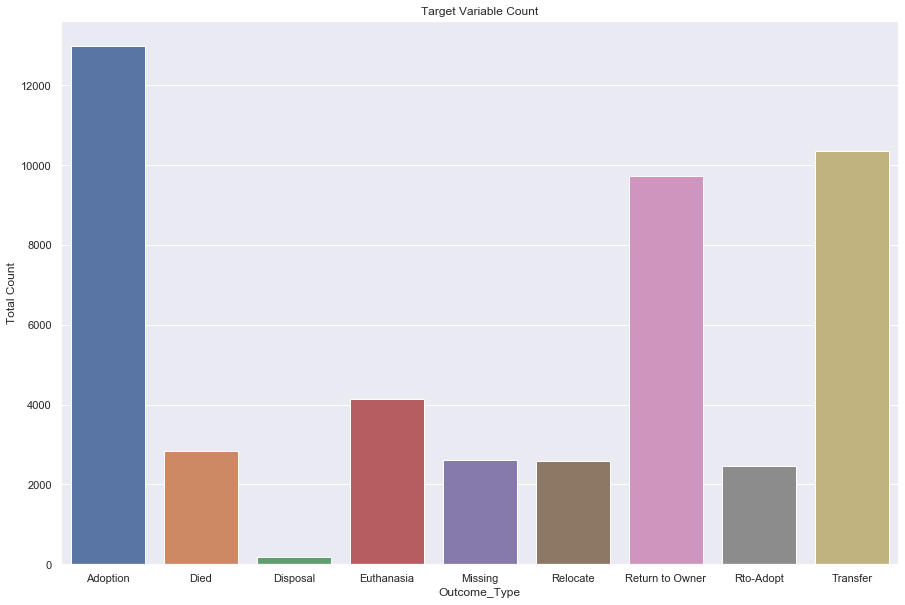

In [23]:
#Plot the count of the target variable.

sns.barplot(x=outcome.index,y=outcome)
sns.set(rc={'figure.figsize':(15,10)})
plt.xlabel("Outcome_Type")
plt.ylabel("Total Count")
plt.title("Target Variable Count")

In [24]:
animal_id=animal_train['animal_id_outcome'].unique()

In [25]:
print(animal_id)

['A006100' 'A047759' 'A134067' ... 'A723130' 'A723131' 'A723132']


In [26]:
animal_id.shape

(42679,)

There are 42679 unique ID's in our train dataset.

In [27]:
#date of year 
dob_year=animal_train['dob_year'].unique()
dob_year

array([2007, 2004, 1997, 1998, 1999, 2000, 1994, 2001, 2002, 2003, 2006,
       2009, 2005, 2011, 1995, 2008, 2013, 2010, 1996, 2016, 2014, 2012,
       2015, 1992, 1993], dtype=int64)

In [28]:
dob_year.shape

(25,)

In [29]:
#Let's Analyse DOB_YEAR with the target variable: outcome_type
year_analysis=pd.crosstab(animal_train.dob_year, animal_train.outcome_type)
year_analysis

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
dob_year,,,,,,,,,
1992,0,0,0,0,0,0,1,0,0
1993,0,0,0,0,0,0,1,0,0
1994,0,0,0,6,0,0,1,0,1
1995,0,0,0,1,0,0,4,0,1
1996,0,0,0,4,0,2,3,0,0
1997,2,0,0,5,0,0,14,0,0
1998,9,0,0,16,1,0,24,1,6
1999,5,2,0,23,2,2,58,0,6
2000,17,5,0,33,3,3,73,3,22


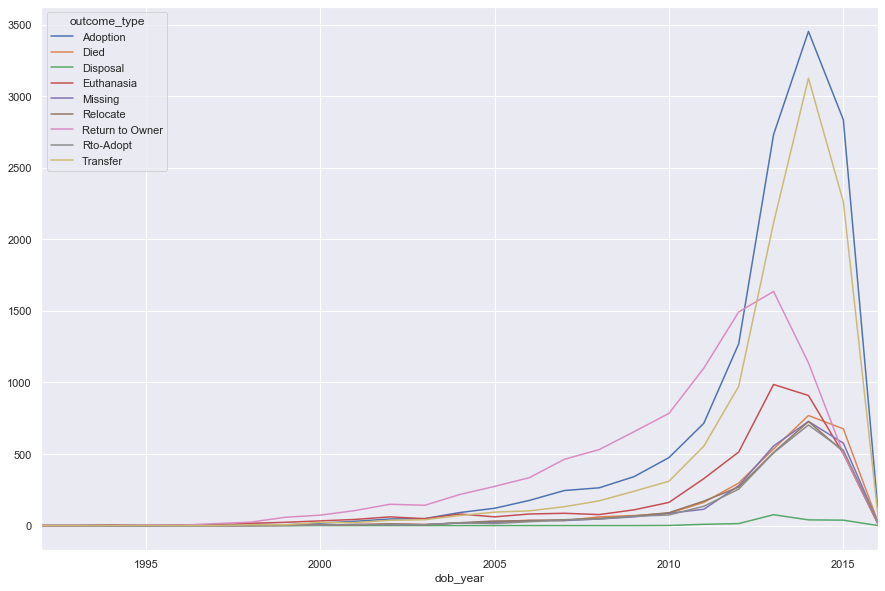

In [30]:
year_analysis.plot()

In [31]:
#Let's Analyse DOB_YEAR with the target variable: outcome_type
month_analysis=pd.crosstab(animal_train.dob_month, animal_train.outcome_type)
month_analysis

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
dob_month,,,,,,,,,
1,990,221,6,277,164,195,874,183,652
2,911,192,28,359,175,177,824,163,626
3,1182,268,32,616,235,257,969,248,964
4,1470,307,10,393,288,284,799,266,1237
5,1170,275,1,404,268,259,844,244,1124
6,1095,248,4,275,232,210,758,198,953
7,1029,231,18,281,229,217,741,198,942
8,1106,262,43,256,233,229,622,213,886
9,1083,219,16,323,210,218,704,205,788


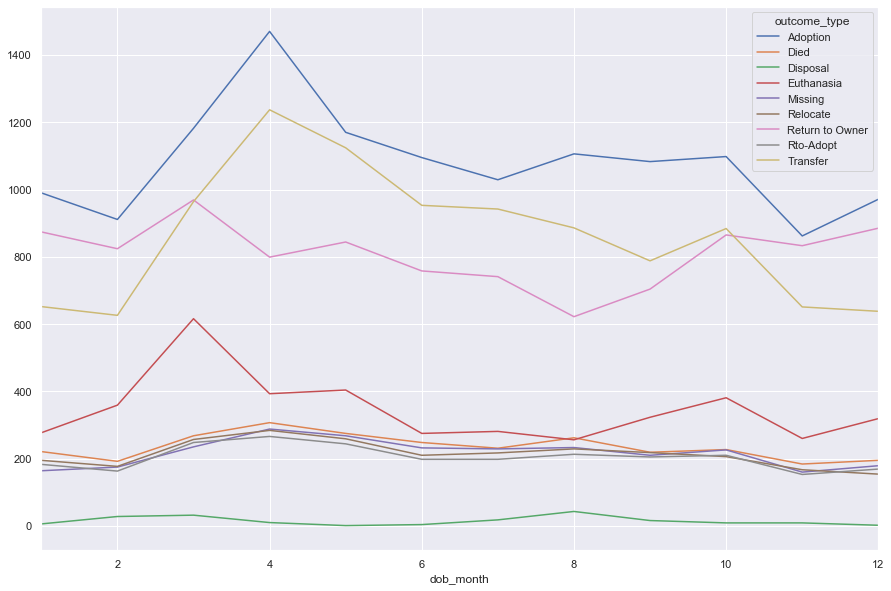

In [32]:
month_analysis.plot()

In [33]:
#Let's Analyse Age upon intake with the target variable: outcome_type
intake_age_analysis=pd.crosstab(animal_train.age_upon_intake, animal_train.outcome_type, margins=True)
intake_age_analysis

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
age_upon_intake,,,,,,,,,,
0 years,59,32,2,10,15,11,8,15,68,220
1 day,46,35,0,3,6,10,0,11,82,193
1 month,1867,342,0,193,302,266,77,273,843,4163
1 week,56,30,0,12,18,16,1,24,202,359
1 weeks,48,11,0,13,16,21,9,17,140,275
1 year,2095,428,94,1087,420,441,1419,384,1646,8014
10 months,141,26,0,11,21,22,78,27,77,403
10 years,128,36,0,89,32,33,293,22,112,745
11 months,112,18,0,10,14,12,100,10,46,322


In [34]:
#Let's Analyse animal_type with the target variable: outcome_type
type_analysis=pd.crosstab(animal_train.animal_type, animal_train.outcome_type, margins=True)
type_analysis

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
animal_type,,,,,,,,,,
Bird,49,13,17,32,7,11,2,7,34,172
Cat,4679,1279,2,1009,1124,1136,896,1049,5777,16951
Dog,8211,1443,3,1305,1433,1386,8802,1363,4276,28222
Other,28,94,156,1798,35,40,18,31,258,2458
All,12967,2829,178,4144,2599,2573,9718,2450,10345,47803


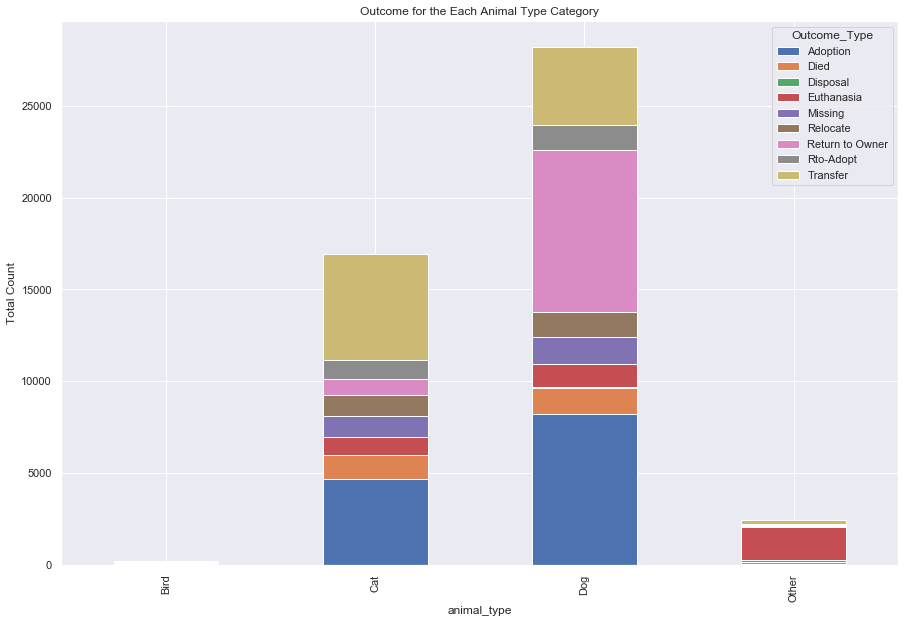

In [35]:
type_analysis=pd.crosstab(animal_train.animal_type, animal_train.outcome_type)
type_analysis.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Type Category")
plt.legend(title='Outcome_Type')
plt.show()

In [36]:
breed_analysis=pd.crosstab(animal_train.breed, animal_train.outcome_type, margins=True)
breed_analysis

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
breed,,,,,,,,,,
Abyssinian Mix,2,1,0,0,0,1,0,0,0,4
Affenpinscher Mix,2,1,0,0,1,0,2,0,0,6
Afghan Hound Mix,0,0,0,0,0,0,1,0,0,1
Airedale Terrier,0,0,0,0,0,0,0,0,1,1
Airedale Terrier Mix,1,0,0,0,1,0,4,0,1,7
...,...,...,...,...,...,...,...,...,...,...
Yorkshire Terrier/Rat Terrier,4,0,0,0,1,0,0,1,1,7
Yorkshire Terrier/Shih Tzu,0,0,0,0,1,0,0,0,0,1
Yorkshire Terrier/Toy Poodle,0,0,0,0,0,0,1,0,0,1


In [37]:
color_analysis=pd.crosstab(animal_train.color, animal_train.outcome_type)
color_analysis

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
color,,,,,,,,,
Agouti,1,0,0,1,0,0,2,0,1
Agouti/Brown Tabby,1,0,0,0,0,0,0,0,0
Agouti/Gray,1,0,0,0,0,0,0,0,0
Apricot,13,2,0,0,0,5,8,3,6
Apricot/Brown,0,0,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...
Yellow/Brown,0,0,0,0,0,0,1,0,0
Yellow/Gray,0,0,0,0,0,0,2,0,0
Yellow/Tan,0,0,0,0,0,0,0,0,1


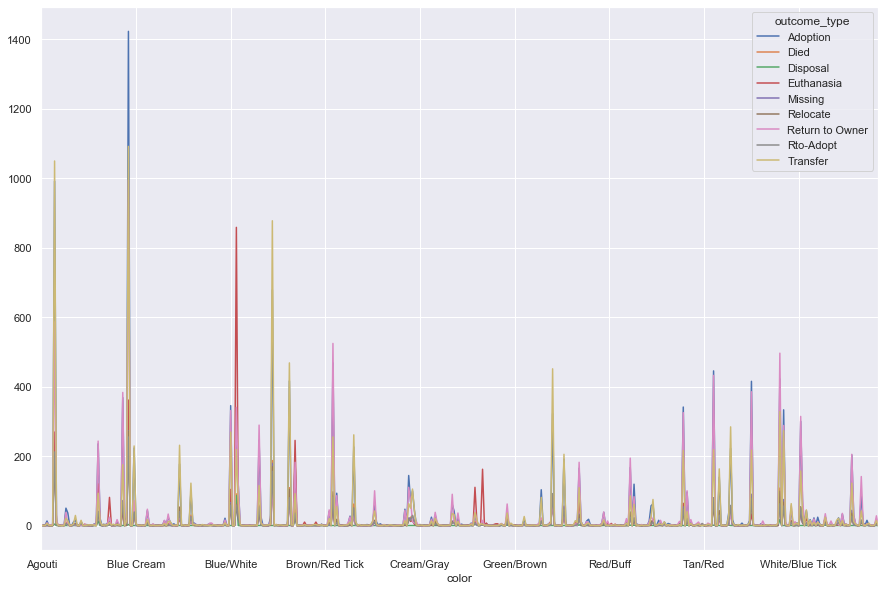

In [38]:
color_analysis.plot()

In [39]:
intake_condition=pd.crosstab(animal_train.intake_condition, animal_train.outcome_type, margins=True)
intake_condition

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
intake_condition,,,,,,,,,,
Aged,26,10,0,62,7,9,88,4,26,232
Feral,9,3,0,3,5,4,4,2,31,61
Injured,406,140,16,943,79,75,330,84,344,2417
Normal,12083,2436,126,2184,2368,2327,9168,2218,8975,41885
Nursing,203,123,0,34,79,76,20,80,541,1156
Other,15,5,0,15,4,10,17,3,28,97
Pregnant,9,3,0,0,1,2,4,1,4,24
Sick,216,109,36,903,56,70,87,58,396,1931
All,12967,2829,178,4144,2599,2573,9718,2450,10345,47803


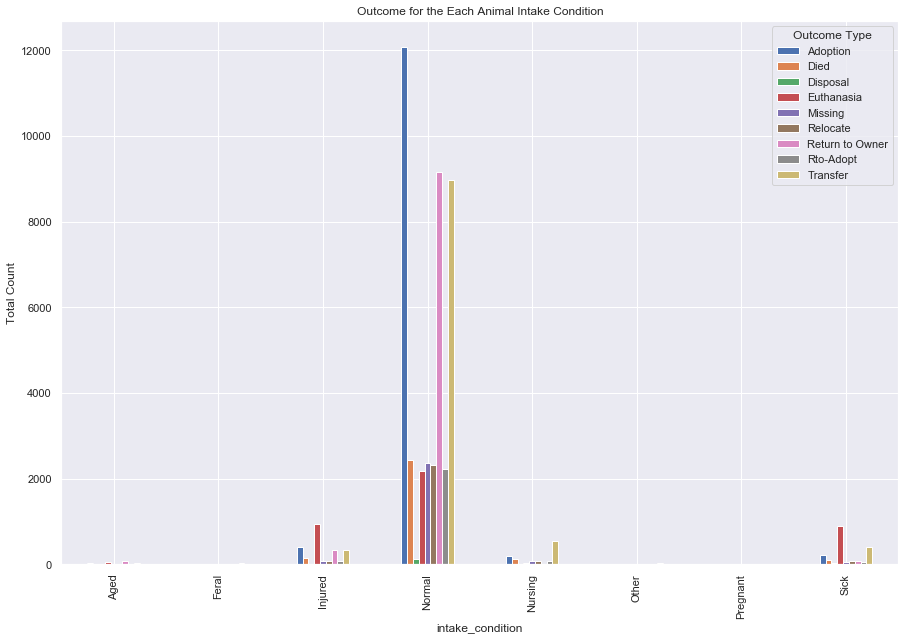

In [40]:
intake_condition=pd.crosstab(animal_train.intake_condition, animal_train.outcome_type)
intake_condition.plot.bar(stacked=False)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Intake Condition")
plt.legend(title='Outcome Type')
plt.show()

In [41]:


intake_type=pd.crosstab(animal_train.intake_type, animal_train.outcome_type, margins=True)
intake_type

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
intake_type,,,,,,,,,,
Euthanasia Request,12,7,0,189,3,1,5,1,17,235
Owner Surrender,3460,644,2,506,649,610,562,588,2089,9110
Public Assist,274,58,20,193,63,74,2154,61,269,3166
Stray,9219,2057,5,1564,1881,1875,6996,1798,7950,33345
Wildlife,2,63,151,1692,3,13,1,2,20,1947
All,12967,2829,178,4144,2599,2573,9718,2450,10345,47803


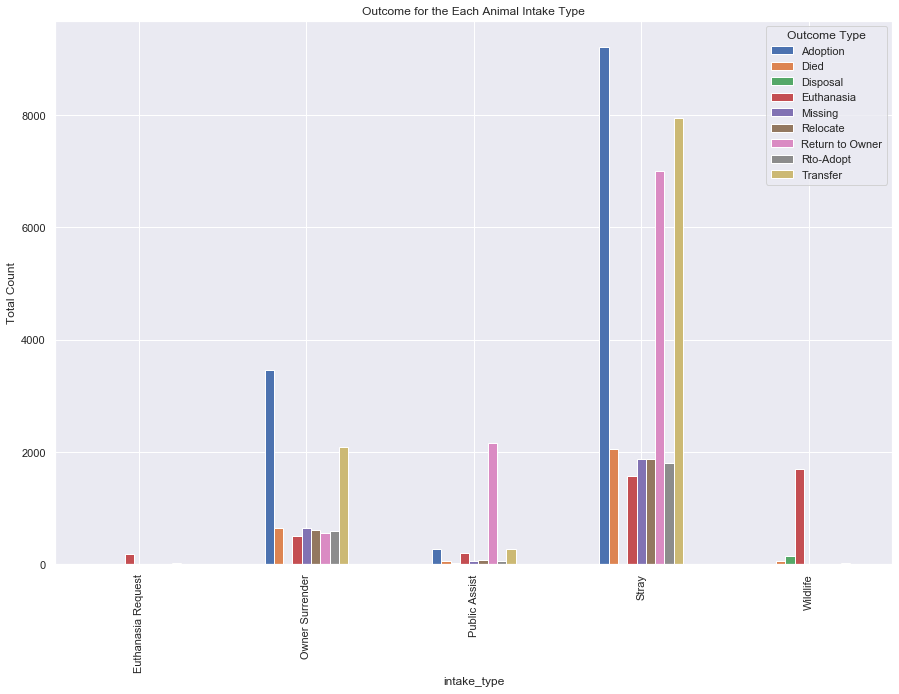

In [42]:
intake_type=pd.crosstab(animal_train.intake_type, animal_train.outcome_type)
intake_type.plot.bar(stacked=False)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Intake Type")
plt.legend(title='Outcome Type')
plt.show()

In [43]:
sex_intake_type=pd.crosstab(animal_train.sex_upon_intake, animal_train.outcome_type, margins=True)
sex_intake_type

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
sex_upon_intake,,,,,,,,,,
Intact Female,4489,915,1,659,921,908,1240,854,3493,13480
Intact Male,4717,985,20,816,906,874,1987,842,3517,14664
Neutered Male,1833,354,1,483,332,354,3621,312,1169,8459
Spayed Female,1907,342,2,302,316,320,2840,324,1044,7397
Unknown,21,233,154,1884,124,117,29,118,1122,3802
All,12967,2829,178,4144,2599,2573,9717,2450,10345,47802


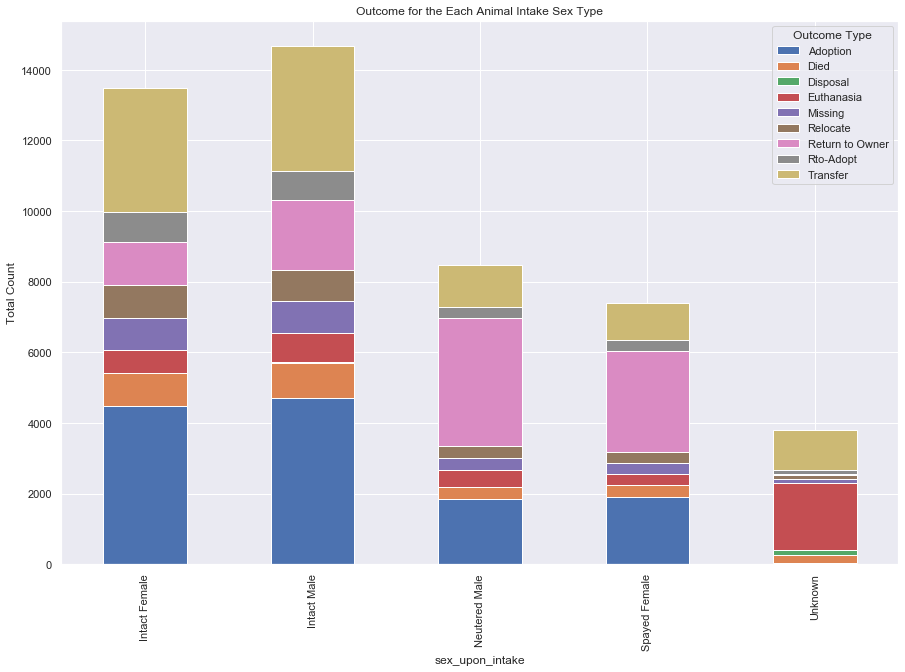

In [44]:
sex_intake_type=pd.crosstab(animal_train.sex_upon_intake, animal_train.outcome_type)
sex_intake_type.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Intake Sex Type")
plt.legend(title='Outcome Type')
plt.show()

In [45]:
animal_train['count'].unique()

array([1], dtype=int64)

In [46]:
age_upon_intake=pd.crosstab(animal_train['age_upon_intake_(years)'], animal_train.outcome_type, margins=True)
age_upon_intake

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
age_upon_intake_(years),,,,,,,,,,
0.0,59,32,2,10,15,11,8,15,68,220
0.0027397260273972607,46,35,0,3,6,10,0,11,82,193
0.0054794520547945215,32,24,0,5,13,17,0,13,103,207
0.00821917808219178,18,27,0,11,16,7,0,11,116,206
0.010958904109589041,31,14,0,10,7,13,0,8,39,122
0.0136986301369863,11,3,0,6,9,1,0,6,34,70
0.01643835616438356,11,8,0,1,11,10,0,4,59,104
0.019178082191780826,104,41,0,25,34,37,10,41,342,634
0.03835616438356165,85,84,0,17,61,58,13,58,468,844


In [47]:
age_upon_intake=pd.crosstab(animal_train['age_upon_intake_(days)'], animal_train.outcome_type, margins=True)
age_upon_intake

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
age_upon_intake_(days),,,,,,,,,,
0,59,32,2,10,15,11,8,15,68,220
1,46,35,0,3,6,10,0,11,82,193
2,32,24,0,5,13,17,0,13,103,207
3,18,27,0,11,16,7,0,11,116,206
4,31,14,0,10,7,13,0,8,39,122
5,11,3,0,6,9,1,0,6,34,70
6,11,8,0,1,11,10,0,4,59,104
7,104,41,0,25,34,37,10,41,342,634
14,85,84,0,17,61,58,13,58,468,844


In [48]:
intake_month_year=pd.crosstab(animal_train['intake_monthyear'], animal_train.animal_type)
intake_month_year

animal_type,Bird,Cat,Dog,Other
intake_monthyear,,,,
2013-10,1,542,963,81
2013-11,4,436,816,65
2013-12,0,331,852,87
2014-01,0,335,876,59
2014-02,5,268,818,99
2014-03,3,353,894,232
2014-04,7,566,857,104
2014-05,3,901,966,86
2014-06,8,821,878,88


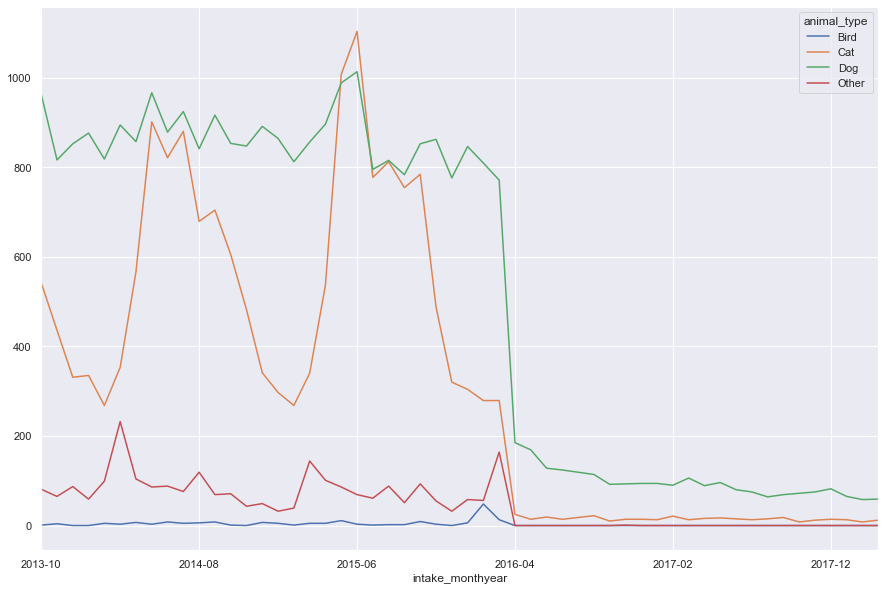

In [46]:
intake_month_year.plot()

In [47]:

intake_weekday=pd.crosstab(animal_train['intake_weekday'], animal_train.animal_type)
intake_weekday

animal_type,Bird,Cat,Dog,Other
intake_weekday,,,,
Friday,25,2336,4009,383
Monday,23,2613,4052,400
Saturday,26,2767,4237,341
Sunday,66,2132,3675,313
Thursday,11,2244,3879,311
Tuesday,11,2437,4055,400
Wednesday,10,2422,4315,310


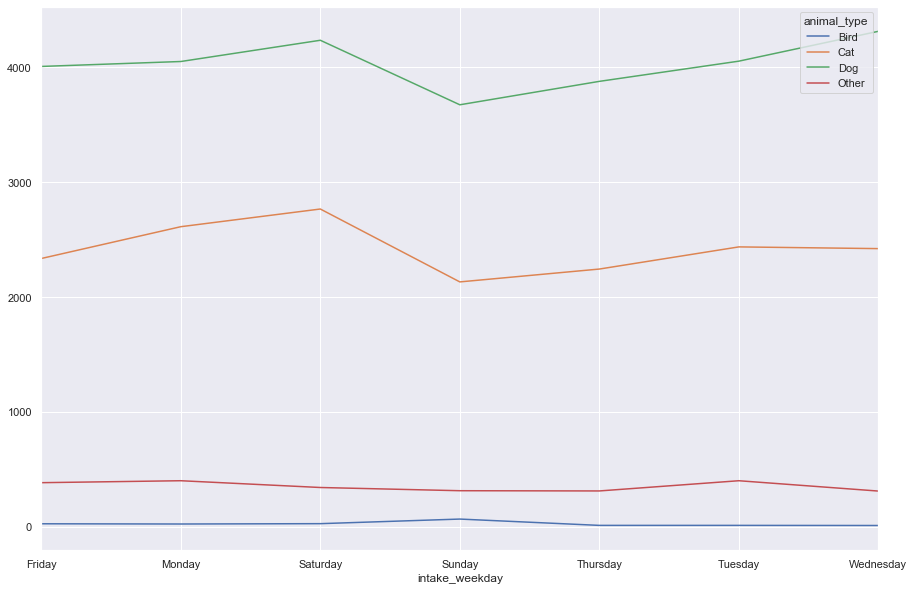

In [48]:
intake_weekday.plot()

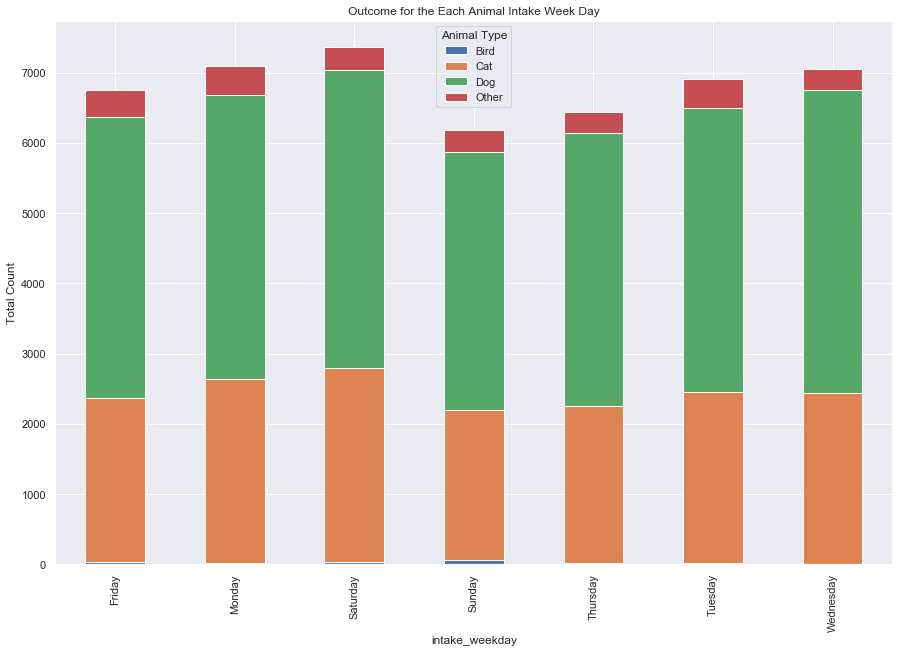

In [49]:
intake_weekday=pd.crosstab(animal_train['intake_weekday'], animal_train.animal_type)
intake_weekday.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Intake Week Day")
plt.legend(title='Animal Type')
plt.show()

In [49]:

intake_weekday=pd.crosstab(animal_train['intake_weekday'], animal_train.outcome_type)
intake_weekday

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
intake_weekday,,,,,,,,,
Friday,1810,429,51,607,350,337,1428,350,1391
Monday,1918,431,20,700,385,340,1382,350,1562
Saturday,2058,430,20,505,413,437,1495,392,1621
Sunday,1656,370,31,542,350,323,1335,301,1278
Thursday,1766,361,19,562,328,339,1325,359,1386
Tuesday,1749,429,22,671,399,378,1307,346,1602
Wednesday,2010,379,15,557,374,419,1446,352,1505


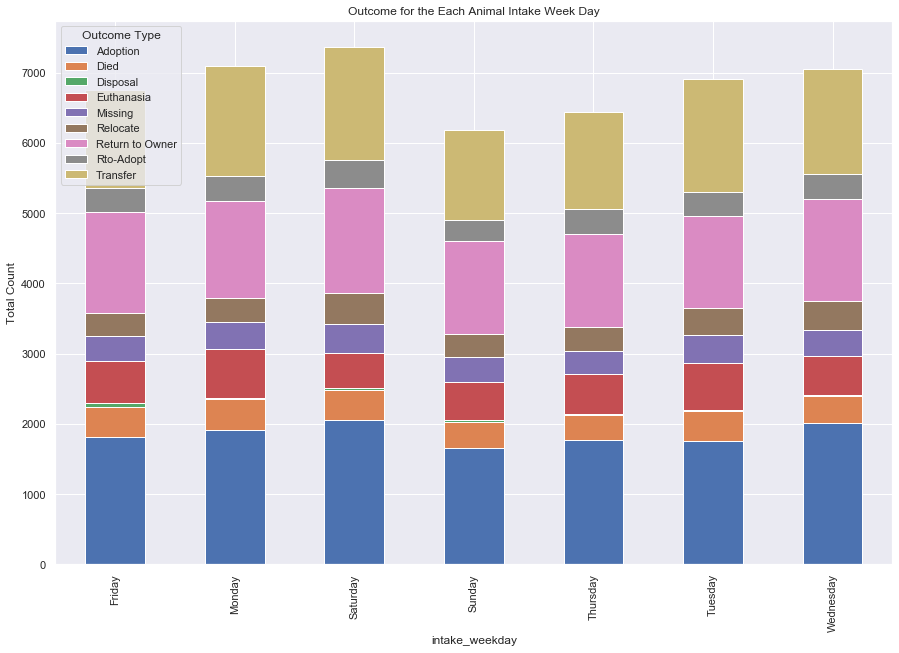

In [50]:
intake_weekday=pd.crosstab(animal_train['intake_weekday'], animal_train.outcome_type)
intake_weekday.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Intake Week Day")
plt.legend(title='Outcome Type')
plt.show()

In [51]:
intake_number=pd.crosstab(animal_train['intake_number'], animal_train.outcome_type, margins=True)
intake_number


outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
intake_number,,,,,,,,,,
1.0,11198,2613,178,4141,2358,2339,7565,2221,10078,42691
2.0,1459,181,0,3,207,202,1480,189,235,3956
3.0,243,26,0,0,26,26,412,32,24,789
4.0,51,6,0,0,4,3,148,8,6,226
5.0,11,1,0,0,3,3,60,0,2,80
6.0,4,2,0,0,1,0,25,0,0,32
7.0,1,0,0,0,0,0,11,0,0,12
8.0,0,0,0,0,0,0,6,0,0,6
9.0,0,0,0,0,0,0,3,0,0,3


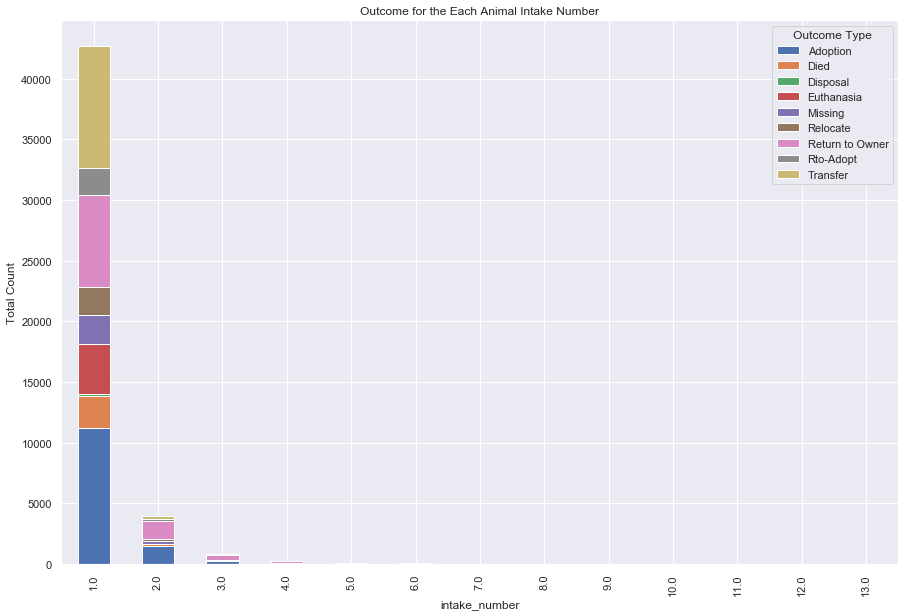

In [52]:
intake_number=pd.crosstab(animal_train['intake_number'], animal_train.outcome_type)
intake_number.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Intake Number")
plt.legend(title='Outcome Type')
plt.show()

In [53]:
intake_number=pd.crosstab(animal_train['intake_number'], animal_train.animal_type, margins=True)
intake_number

animal_type,Bird,Cat,Dog,Other,All
intake_number,,,,,
1.0,172,16192,23873,2454,42691
2.0,0,689,3263,4,3956
3.0,0,67,722,0,789
4.0,0,2,224,0,226
5.0,0,1,79,0,80
6.0,0,0,32,0,32
7.0,0,0,12,0,12
8.0,0,0,6,0,6
9.0,0,0,3,0,3


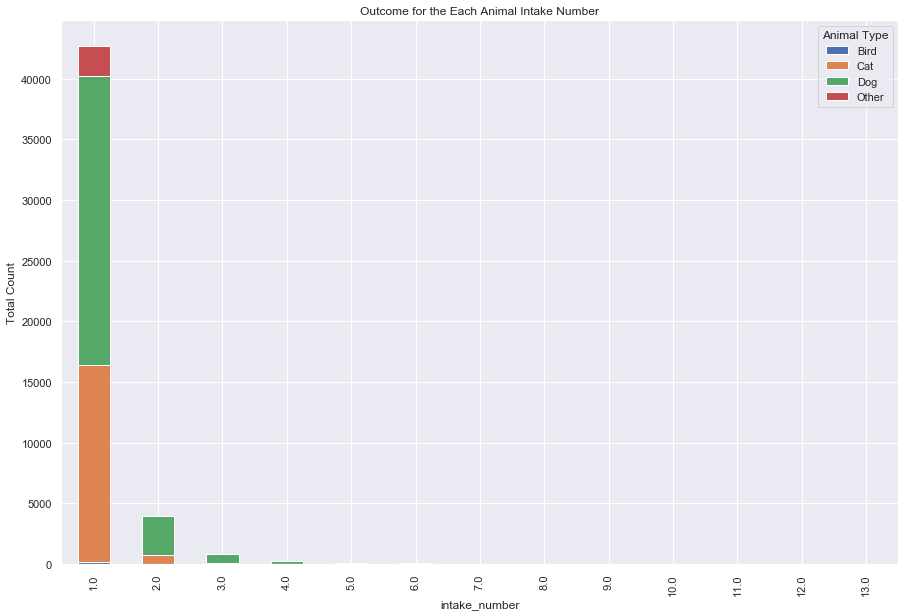

In [54]:
intake_number=pd.crosstab(animal_train['intake_number'], animal_train.animal_type)
intake_number.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Intake Number")
plt.legend(title='Animal Type')
plt.show()

In [55]:
#Intake Vs Outcome

#Lets compare whether the age and sex are same for intake and outcome

animal_train['sex_upon_intake'].equals(animal_train['sex_upon_outcome'])

False

In [56]:
animal_train['age_upon_intake_(years)'].equals(animal_train['age_upon_outcome_(years)'])

False

In [57]:
age_upon_outcome=pd.crosstab(animal_train['age_upon_outcome_(years)'], animal_train.outcome_type, margins=True)
age_upon_outcome

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
age_upon_outcome_(years),,,,,,,,,,
0.0,1,5,0,6,4,2,1,4,28,51
0.0027397260273972607,0,8,0,3,5,4,7,4,63,94
0.0054794520547945215,0,23,0,5,7,11,0,10,89,145
0.00821917808219178,0,20,0,9,10,6,0,9,107,161
0.010958904109589041,0,15,0,4,5,5,0,5,48,82
0.0136986301369863,1,9,0,12,4,1,0,1,24,52
0.01643835616438356,0,10,0,1,8,4,0,2,55,80
0.019178082191780826,1,37,1,20,27,25,0,31,348,490
0.03835616438356165,0,69,1,20,57,52,19,53,480,751


In [58]:
age_upon_outcome=pd.crosstab(animal_train['age_upon_outcome_(days)'], animal_train.outcome_type, margins=True)
age_upon_outcome

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
age_upon_outcome_(days),,,,,,,,,,
0,1,5,0,6,4,2,1,4,28,51
1,0,8,0,3,5,4,7,4,63,94
2,0,23,0,5,7,11,0,10,89,145
3,0,20,0,9,10,6,0,9,107,161
4,0,15,0,4,5,5,0,5,48,82
5,1,9,0,12,4,1,0,1,24,52
6,0,10,0,1,8,4,0,2,55,80
7,1,37,1,20,27,25,0,31,348,490
14,0,69,1,20,57,52,19,53,480,751


In [59]:
outcome_month_year=pd.crosstab(animal_train['outcome_monthyear'], animal_train.animal_type)
outcome_month_year

animal_type,Bird,Cat,Dog,Other
outcome_monthyear,,,,
2013-10,0,335,666,78
2013-11,3,358,772,66
2013-12,2,489,850,85
2014-01,0,341,826,58
2014-02,2,262,761,93
2014-03,6,334,910,228
2014-04,5,444,840,115
2014-05,5,622,916,84
2014-06,8,803,853,89


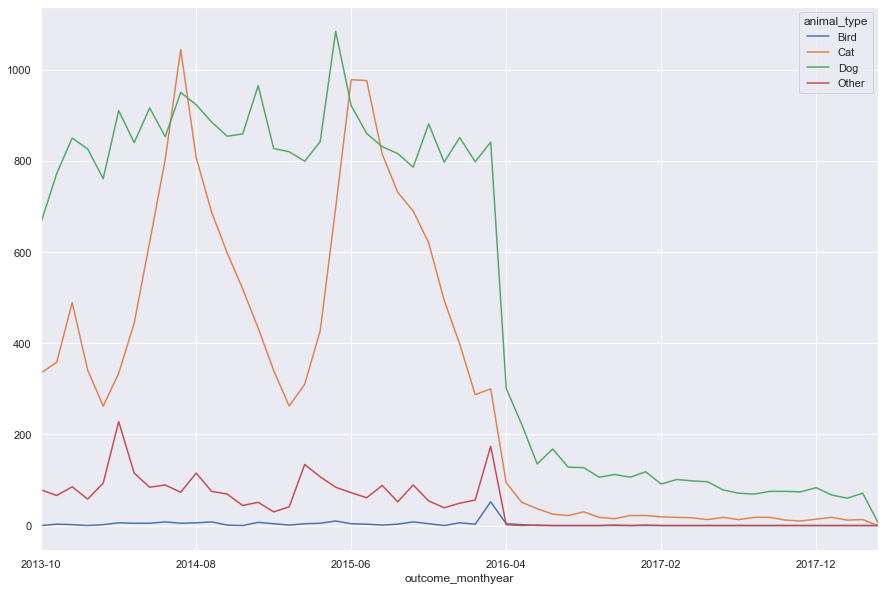

In [62]:
outcome_month_year.plot()

In [63]:

outcome_weekday=pd.crosstab(animal_train['outcome_weekday'], animal_train.animal_type)
outcome_weekday

animal_type,Bird,Cat,Dog,Other
outcome_weekday,,,,
Friday,21,2244,3773,304
Monday,18,2348,4208,361
Saturday,15,2829,4507,277
Sunday,21,2596,4601,402
Thursday,14,2034,3677,318
Tuesday,51,2638,3858,373
Wednesday,32,2262,3598,423


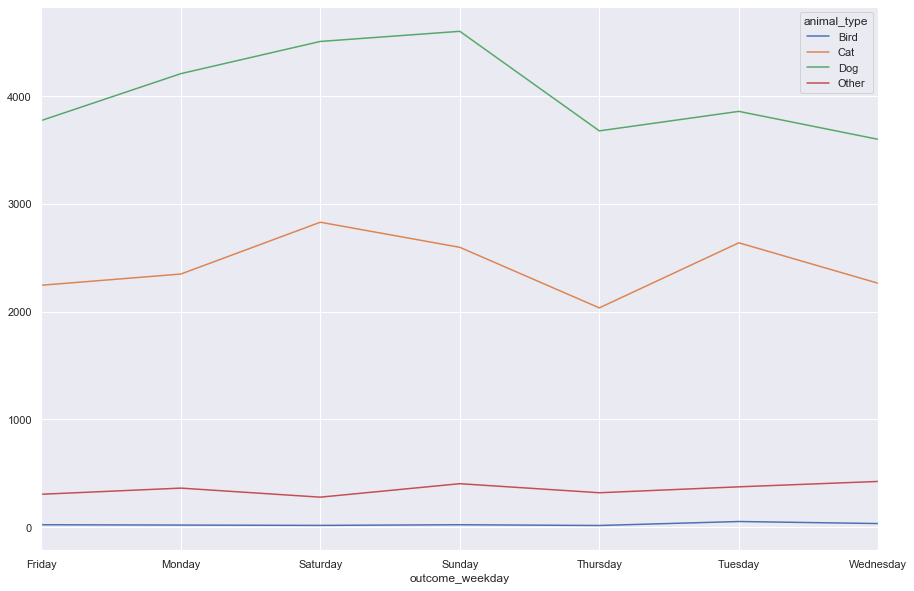

In [64]:
outcome_weekday.plot()

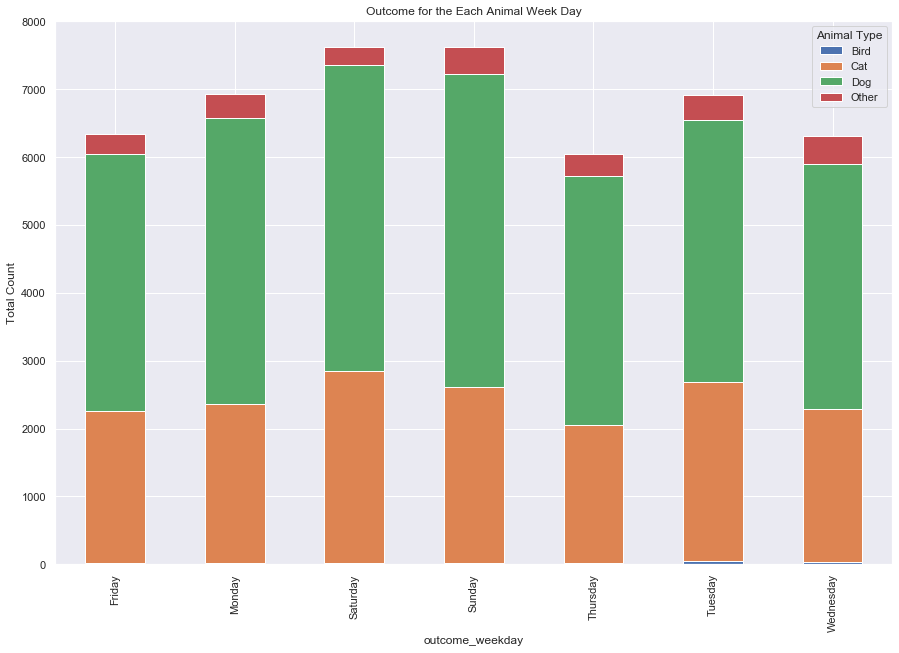

In [65]:
outcome_weekday=pd.crosstab(animal_train['outcome_weekday'], animal_train.animal_type)
outcome_weekday.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Week Day")
plt.legend(title='Animal Type')
plt.show()

In [66]:
outcome_weekday=pd.crosstab(animal_train['outcome_weekday'], animal_train.outcome_type)
outcome_weekday

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
outcome_weekday,,,,,,,,,
Friday,1509,366,12,587,326,325,1381,302,1534
Monday,1646,384,22,672,350,348,1523,356,1634
Saturday,2751,493,39,423,467,422,1319,405,1309
Sunday,2649,458,32,560,455,428,1321,434,1283
Thursday,1335,321,19,623,311,335,1357,304,1438
Tuesday,1654,412,18,641,370,381,1444,347,1653
Wednesday,1423,395,36,638,320,334,1373,302,1494


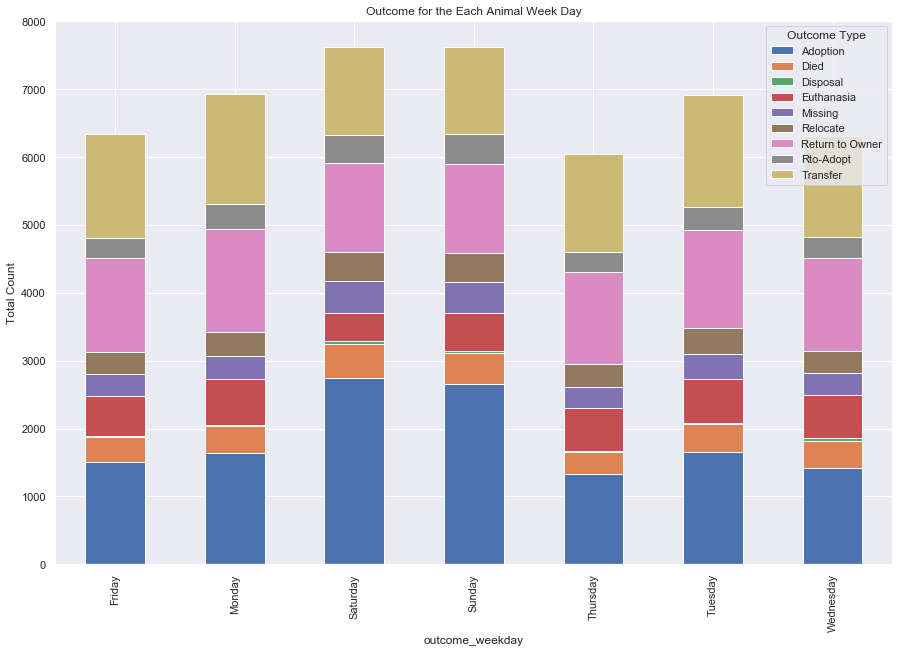

In [67]:
outcome_weekday=pd.crosstab(animal_train['outcome_weekday'], animal_train.outcome_type)
outcome_weekday.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Week Day")
plt.legend(title='Outcome Type')
plt.show()

In [68]:
outcome_number=pd.crosstab(animal_train['outcome_number'], animal_train.outcome_type, margins=True)
outcome_number

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
outcome_number,,,,,,,,,,
1.0,11198,2613,178,4141,2358,2339,7565,2221,10078,42691
2.0,1459,181,0,3,207,202,1480,189,235,3956
3.0,243,26,0,0,26,26,412,32,24,789
4.0,51,6,0,0,4,3,148,8,6,226
5.0,11,1,0,0,3,3,60,0,2,80
6.0,4,2,0,0,1,0,25,0,0,32
7.0,1,0,0,0,0,0,11,0,0,12
8.0,0,0,0,0,0,0,6,0,0,6
9.0,0,0,0,0,0,0,3,0,0,3


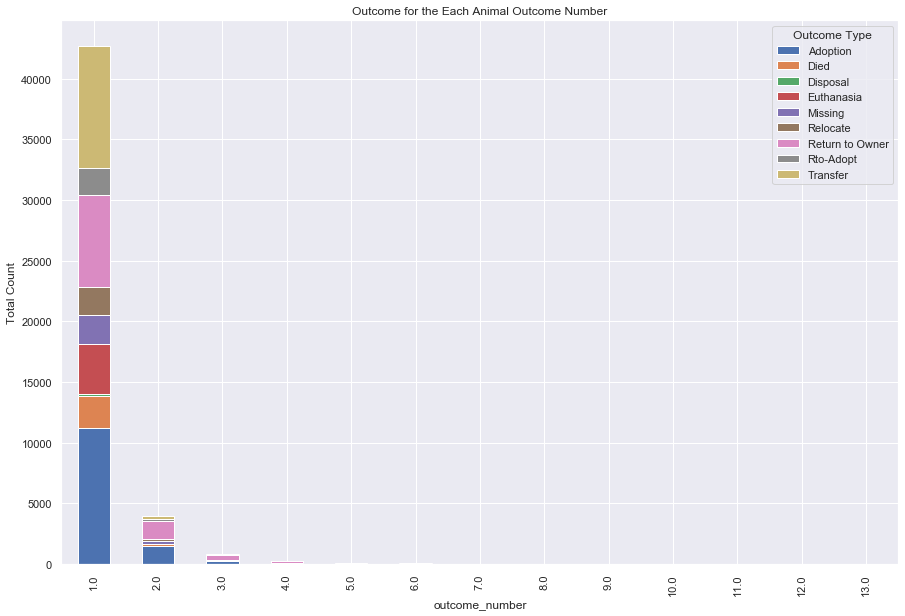

In [69]:
outcome_number=pd.crosstab(animal_train['outcome_number'], animal_train.outcome_type)
outcome_number.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Outcome Number")
plt.legend(title='Outcome Type')
plt.show()

In [70]:
outcome_number=pd.crosstab(animal_train['outcome_number'], animal_train.animal_type, margins=True)
outcome_number

animal_type,Bird,Cat,Dog,Other,All
outcome_number,,,,,
1.0,172,16192,23873,2454,42691
2.0,0,689,3263,4,3956
3.0,0,67,722,0,789
4.0,0,2,224,0,226
5.0,0,1,79,0,80
6.0,0,0,32,0,32
7.0,0,0,12,0,12
8.0,0,0,6,0,6
9.0,0,0,3,0,3


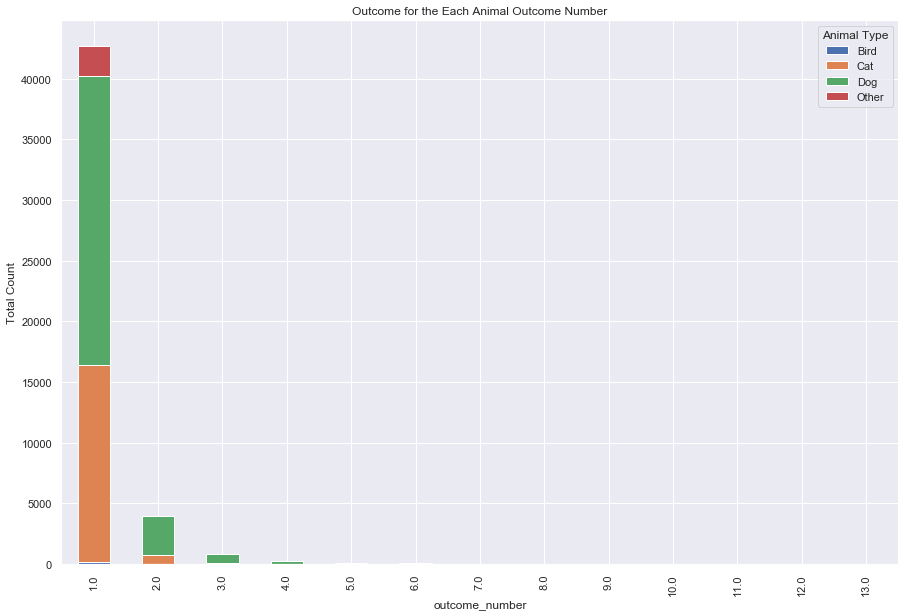

In [71]:
outcome_number=pd.crosstab(animal_train['outcome_number'], animal_train.animal_type)
outcome_number.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Outcome Number")
plt.legend(title='Animal Type')
plt.show()

In [72]:
sex_outcome_type=pd.crosstab(animal_train.sex_upon_outcome, animal_train.outcome_type, margins=True)
sex_outcome_type

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer,All
sex_upon_outcome,,,,,,,,,,
Intact Female,235,361,1,616,324,324,549,318,2650,5378
Intact Male,206,383,20,753,300,286,910,250,2456,5564
Neutered Male,6344,956,1,546,938,942,4698,904,2230,17559
Spayed Female,6161,896,2,345,913,904,3531,860,1887,15499
Unknown,21,233,154,1884,124,117,29,118,1122,3802
All,12967,2829,178,4144,2599,2573,9717,2450,10345,47802


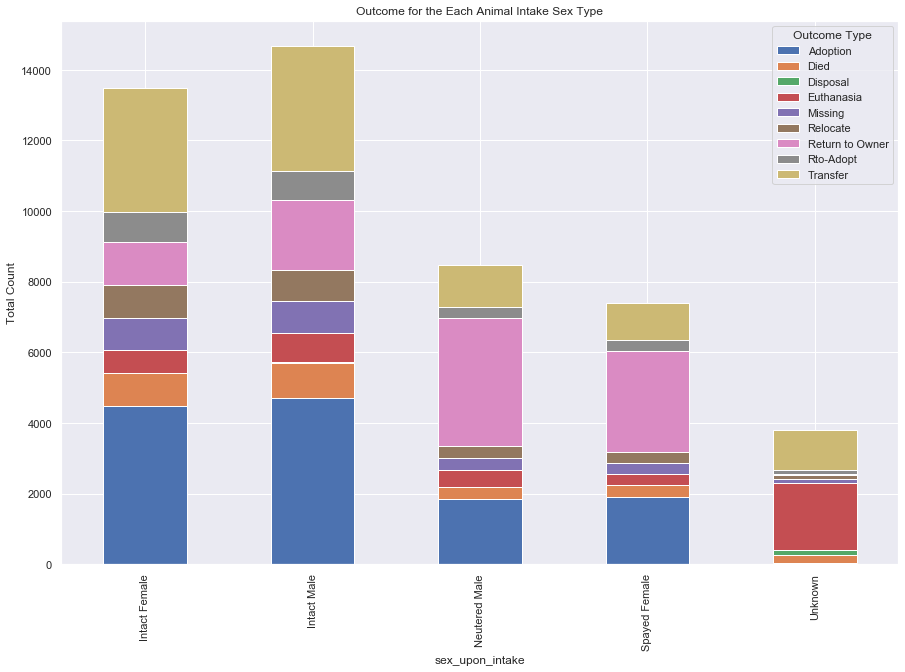

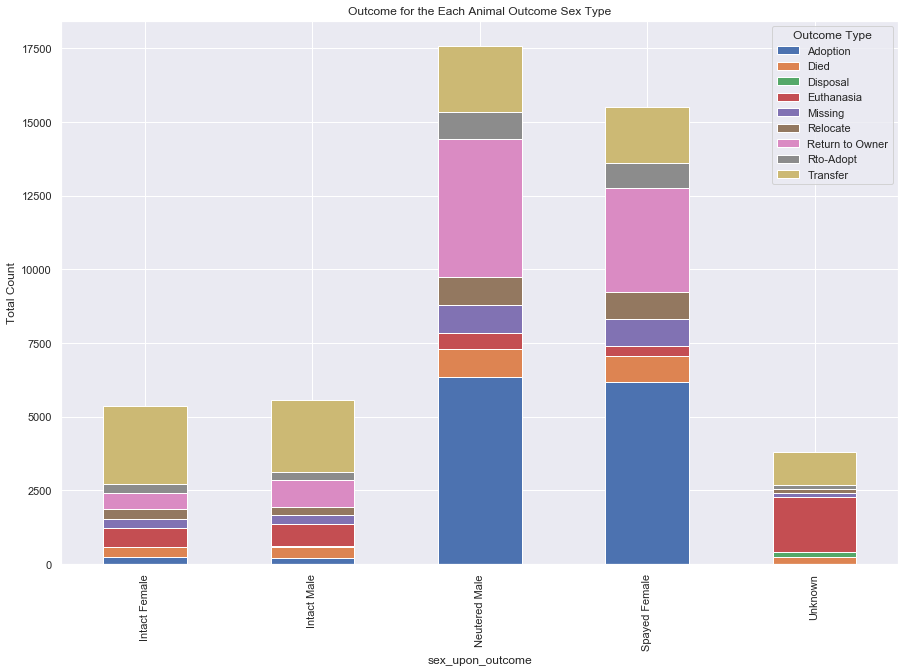

In [73]:
sex_intake_type=pd.crosstab(animal_train.sex_upon_intake, animal_train.outcome_type)
sex_intake_type.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Intake Sex Type")
plt.legend(title='Outcome Type')
plt.show()



sex_outcome_type=pd.crosstab(animal_train.sex_upon_outcome, animal_train.outcome_type)
sex_outcome_type.plot.bar(stacked=True)
plt.ylabel("Total Count")
plt.title("Outcome for the Each Animal Outcome Sex Type")
plt.legend(title='Outcome Type')
plt.show()


That's it for the EDA part. Lets build some basic model and check

### Model Building

In [74]:
animal_train.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_type', 'breed', 'color', 'intake_condition', 'intake_type',
       'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'age_upon_outcome', 'date_of_birth',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_month', 'outcome_year', 'outcome_monthyear', 'outcome_weekday',
       'outcome_hour', 'outcome_number', 'outcome_type'],
      dtype='object')

In [75]:
animal_train.dtypes

animal_id_outcome              object
dob_year                        int64
dob_month                       int64
age_upon_intake                object
animal_type                    object
breed                          object
color                          object
intake_condition               object
intake_type                    object
sex_upon_intake                object
count                           int64
age_upon_intake_(days)          int64
age_upon_intake_(years)       float64
age_upon_intake_age_group      object
intake_datetime                object
intake_month                    int64
intake_year                     int64
intake_monthyear               object
intake_weekday                 object
intake_hour                     int64
intake_number                 float64
time_in_shelter                object
time_in_shelter_days          float64
age_upon_outcome               object
date_of_birth                  object
sex_upon_outcome               object
age_upon_out

In [76]:
#Selecting columns for model building
columns =['dob_year', 'dob_month', 'age_upon_intake',
       'animal_type','intake_condition', 'intake_type',
       'sex_upon_intake','age_upon_intake_(days)',
       'intake_month', 'intake_year',
       'intake_weekday', 'intake_number',
       'time_in_shelter_days', 'age_upon_outcome',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'outcome_month', 'outcome_year', 'outcome_weekday',
       'outcome_number']

In [77]:
animal_train = animal_train[columns]
animal_test = animal_test[columns]

In [78]:
animal_train.dtypes

dob_year                     int64
dob_month                    int64
age_upon_intake             object
animal_type                 object
intake_condition            object
intake_type                 object
sex_upon_intake             object
age_upon_intake_(days)       int64
intake_month                 int64
intake_year                  int64
intake_weekday              object
intake_number              float64
time_in_shelter_days       float64
age_upon_outcome            object
sex_upon_outcome            object
age_upon_outcome_(days)      int64
outcome_month                int64
outcome_year                 int64
outcome_weekday             object
outcome_number             float64
dtype: object

In [79]:
animal_test.dtypes

dob_year                     int64
dob_month                    int64
age_upon_intake             object
animal_type                 object
intake_condition            object
intake_type                 object
sex_upon_intake             object
age_upon_intake_(days)       int64
intake_month                 int64
intake_year                  int64
intake_weekday              object
intake_number                int64
time_in_shelter_days       float64
age_upon_outcome            object
sex_upon_outcome            object
age_upon_outcome_(days)      int64
outcome_month                int64
outcome_year                 int64
outcome_weekday             object
outcome_number               int64
dtype: object

In [80]:
animal_train.head(4)

,dob_year,dob_month,age_upon_intake,animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),intake_month,intake_year,intake_weekday,intake_number,time_in_shelter_days,age_upon_outcome,sex_upon_outcome,age_upon_outcome_(days),outcome_month,outcome_year,outcome_weekday,outcome_number
0,2007,7,10 years,Dog,Normal,Stray,Neutered Male,3650,12,2017,Thursday,1.0,0.588194,10 years,Neutered Male,3650,12,2017,Thursday,1.0
1,2007,7,7 years,Dog,Normal,Public Assist,Neutered Male,2555,12,2014,Friday,2.0,1.259722,7 years,Neutered Male,2555,12,2014,Saturday,2.0
2,2007,7,6 years,Dog,Normal,Public Assist,Neutered Male,2190,3,2014,Friday,3.0,1.113889,6 years,Neutered Male,2190,3,2014,Saturday,3.0
3,2004,4,10 years,Dog,Normal,Owner Surrender,Neutered Male,3650,4,2014,Wednesday,1.0,4.970139,10 years,Neutered Male,3650,4,2014,Monday,1.0


In [81]:
animal_test.head(4)

,dob_year,dob_month,age_upon_intake,animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),intake_month,intake_year,intake_weekday,intake_number,time_in_shelter_days,age_upon_outcome,sex_upon_outcome,age_upon_outcome_(days),outcome_month,outcome_year,outcome_weekday,outcome_number
0,2013,3,3 years,Cat,Nursing,Stray,Intact Female,1095,3,2016,Sunday,1,5.200000,3 years,Spayed Female,1095,4,2016,Friday,1
1,2016,2,4 weeks,Cat,Nursing,Stray,Intact Female,28,3,2016,Sunday,1,34.257639,2 months,Spayed Female,60,4,2016,Saturday,1
2,2016,2,4 weeks,Cat,Nursing,Stray,Intact Male,28,3,2016,Sunday,1,32.520139,2 months,Neutered Male,60,4,2016,Friday,1
3,2016,2,4 weeks,Cat,Nursing,Stray,Intact Female,28,3,2016,Sunday,1,31.094444,1 month,Intact Female,30,4,2016,Wednesday,1


In [82]:
animal_train.shape

(47803, 20)

In [83]:
animal_test.shape

(31869, 20)

In [84]:
animal_train['type']= 'train'

In [85]:
animal_train.head(3)

,dob_year,dob_month,age_upon_intake,animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),intake_month,intake_year,...,intake_number,time_in_shelter_days,age_upon_outcome,sex_upon_outcome,age_upon_outcome_(days),outcome_month,outcome_year,outcome_weekday,outcome_number,type
0,2007,7,10 years,Dog,Normal,Stray,Neutered Male,3650,12,2017,...,1.0,0.588194,10 years,Neutered Male,3650,12,2017,Thursday,1.0,train
1,2007,7,7 years,Dog,Normal,Public Assist,Neutered Male,2555,12,2014,...,2.0,1.259722,7 years,Neutered Male,2555,12,2014,Saturday,2.0,train
2,2007,7,6 years,Dog,Normal,Public Assist,Neutered Male,2190,3,2014,...,3.0,1.113889,6 years,Neutered Male,2190,3,2014,Saturday,3.0,train


In [86]:
animal_test['type']= 'test'

In [87]:
#Combine the train_test dataset for dummifying the variables in proper way

frame = [animal_train, animal_test]
complete_dataset = pd.concat(frame)

In [88]:
complete_dataset.head(3)

,dob_year,dob_month,age_upon_intake,animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),intake_month,intake_year,...,intake_number,time_in_shelter_days,age_upon_outcome,sex_upon_outcome,age_upon_outcome_(days),outcome_month,outcome_year,outcome_weekday,outcome_number,type
0,2007,7,10 years,Dog,Normal,Stray,Neutered Male,3650,12,2017,...,1.0,0.588194,10 years,Neutered Male,3650,12,2017,Thursday,1.0,train
1,2007,7,7 years,Dog,Normal,Public Assist,Neutered Male,2555,12,2014,...,2.0,1.259722,7 years,Neutered Male,2555,12,2014,Saturday,2.0,train
2,2007,7,6 years,Dog,Normal,Public Assist,Neutered Male,2190,3,2014,...,3.0,1.113889,6 years,Neutered Male,2190,3,2014,Saturday,3.0,train


In [89]:
category=['dob_year','age_upon_intake','animal_type','intake_condition','intake_type',
          'sex_upon_intake','intake_weekday','age_upon_outcome','dob_month','intake_month','intake_year',
          'sex_upon_outcome','outcome_weekday','outcome_month','outcome_year','type']
for i in category:
    animal_train[i]=animal_train[i].astype('category')
    
for i in category:
    animal_test[i]=animal_test[i].astype('category')

for i in category:
    complete_dataset[i]=complete_dataset[i].astype('category') 

In [90]:
animal_train.dtypes

dob_year                   category
dob_month                  category
age_upon_intake            category
animal_type                category
intake_condition           category
intake_type                category
sex_upon_intake            category
age_upon_intake_(days)        int64
intake_month               category
intake_year                category
intake_weekday             category
intake_number               float64
time_in_shelter_days        float64
age_upon_outcome           category
sex_upon_outcome           category
age_upon_outcome_(days)       int64
outcome_month              category
outcome_year               category
outcome_weekday            category
outcome_number              float64
type                       category
dtype: object

In [91]:
animal_test.dtypes

dob_year                   category
dob_month                  category
age_upon_intake            category
animal_type                category
intake_condition           category
intake_type                category
sex_upon_intake            category
age_upon_intake_(days)        int64
intake_month               category
intake_year                category
intake_weekday             category
intake_number                 int64
time_in_shelter_days        float64
age_upon_outcome           category
sex_upon_outcome           category
age_upon_outcome_(days)       int64
outcome_month              category
outcome_year               category
outcome_weekday            category
outcome_number                int64
type                       category
dtype: object

In [92]:
animal_train.head(3)

,dob_year,dob_month,age_upon_intake,animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),intake_month,intake_year,...,intake_number,time_in_shelter_days,age_upon_outcome,sex_upon_outcome,age_upon_outcome_(days),outcome_month,outcome_year,outcome_weekday,outcome_number,type
0,2007,7,10 years,Dog,Normal,Stray,Neutered Male,3650,12,2017,...,1.0,0.588194,10 years,Neutered Male,3650,12,2017,Thursday,1.0,train
1,2007,7,7 years,Dog,Normal,Public Assist,Neutered Male,2555,12,2014,...,2.0,1.259722,7 years,Neutered Male,2555,12,2014,Saturday,2.0,train
2,2007,7,6 years,Dog,Normal,Public Assist,Neutered Male,2190,3,2014,...,3.0,1.113889,6 years,Neutered Male,2190,3,2014,Saturday,3.0,train


In [93]:
complete_dataset.dtypes

dob_year                   category
dob_month                  category
age_upon_intake            category
animal_type                category
intake_condition           category
intake_type                category
sex_upon_intake            category
age_upon_intake_(days)        int64
intake_month               category
intake_year                category
intake_weekday             category
intake_number               float64
time_in_shelter_days        float64
age_upon_outcome           category
sex_upon_outcome           category
age_upon_outcome_(days)       int64
outcome_month              category
outcome_year               category
outcome_weekday            category
outcome_number              float64
type                       category
dtype: object

In [94]:
float_cate = ['outcome_number','intake_number','time_in_shelter_days']

animal_train[float_cate]= animal_train[float_cate].astype('int64')
animal_test[float_cate]= animal_test[float_cate].astype('int64')
complete_dataset[float_cate]=complete_dataset[float_cate].astype('int64')

In [95]:
animal_train.dtypes

dob_year                   category
dob_month                  category
age_upon_intake            category
animal_type                category
intake_condition           category
intake_type                category
sex_upon_intake            category
age_upon_intake_(days)        int64
intake_month               category
intake_year                category
intake_weekday             category
intake_number                 int64
time_in_shelter_days          int64
age_upon_outcome           category
sex_upon_outcome           category
age_upon_outcome_(days)       int64
outcome_month              category
outcome_year               category
outcome_weekday            category
outcome_number                int64
type                       category
dtype: object

In [96]:
animal_test.dtypes

dob_year                   category
dob_month                  category
age_upon_intake            category
animal_type                category
intake_condition           category
intake_type                category
sex_upon_intake            category
age_upon_intake_(days)        int64
intake_month               category
intake_year                category
intake_weekday             category
intake_number                 int64
time_in_shelter_days          int64
age_upon_outcome           category
sex_upon_outcome           category
age_upon_outcome_(days)       int64
outcome_month              category
outcome_year               category
outcome_weekday            category
outcome_number                int64
type                       category
dtype: object

In [97]:
animal_train.head()

,dob_year,dob_month,age_upon_intake,animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),intake_month,intake_year,...,intake_number,time_in_shelter_days,age_upon_outcome,sex_upon_outcome,age_upon_outcome_(days),outcome_month,outcome_year,outcome_weekday,outcome_number,type
0,2007,7,10 years,Dog,Normal,Stray,Neutered Male,3650,12,2017,...,1,0,10 years,Neutered Male,3650,12,2017,Thursday,1,train
1,2007,7,7 years,Dog,Normal,Public Assist,Neutered Male,2555,12,2014,...,2,1,7 years,Neutered Male,2555,12,2014,Saturday,2,train
2,2007,7,6 years,Dog,Normal,Public Assist,Neutered Male,2190,3,2014,...,3,1,6 years,Neutered Male,2190,3,2014,Saturday,3,train
3,2004,4,10 years,Dog,Normal,Owner Surrender,Neutered Male,3650,4,2014,...,1,4,10 years,Neutered Male,3650,4,2014,Monday,1,train
4,1997,10,16 years,Dog,Injured,Public Assist,Neutered Male,5840,11,2013,...,1,0,16 years,Neutered Male,5840,11,2013,Saturday,1,train


In [98]:
animal_test.head()

,dob_year,dob_month,age_upon_intake,animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),intake_month,intake_year,...,intake_number,time_in_shelter_days,age_upon_outcome,sex_upon_outcome,age_upon_outcome_(days),outcome_month,outcome_year,outcome_weekday,outcome_number,type
0,2013,3,3 years,Cat,Nursing,Stray,Intact Female,1095,3,2016,...,1,5,3 years,Spayed Female,1095,4,2016,Friday,1,test
1,2016,2,4 weeks,Cat,Nursing,Stray,Intact Female,28,3,2016,...,1,34,2 months,Spayed Female,60,4,2016,Saturday,1,test
2,2016,2,4 weeks,Cat,Nursing,Stray,Intact Male,28,3,2016,...,1,32,2 months,Neutered Male,60,4,2016,Friday,1,test
3,2016,2,4 weeks,Cat,Nursing,Stray,Intact Female,28,3,2016,...,1,31,1 month,Intact Female,30,4,2016,Wednesday,1,test
4,2016,2,4 weeks,Cat,Nursing,Stray,Intact Female,28,3,2016,...,1,37,2 months,Intact Female,60,5,2016,Tuesday,1,test


In [99]:
complete_dataset.head()

,dob_year,dob_month,age_upon_intake,animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),intake_month,intake_year,...,intake_number,time_in_shelter_days,age_upon_outcome,sex_upon_outcome,age_upon_outcome_(days),outcome_month,outcome_year,outcome_weekday,outcome_number,type
0,2007,7,10 years,Dog,Normal,Stray,Neutered Male,3650,12,2017,...,1,0,10 years,Neutered Male,3650,12,2017,Thursday,1,train
1,2007,7,7 years,Dog,Normal,Public Assist,Neutered Male,2555,12,2014,...,2,1,7 years,Neutered Male,2555,12,2014,Saturday,2,train
2,2007,7,6 years,Dog,Normal,Public Assist,Neutered Male,2190,3,2014,...,3,1,6 years,Neutered Male,2190,3,2014,Saturday,3,train
3,2004,4,10 years,Dog,Normal,Owner Surrender,Neutered Male,3650,4,2014,...,1,4,10 years,Neutered Male,3650,4,2014,Monday,1,train
4,1997,10,16 years,Dog,Injured,Public Assist,Neutered Male,5840,11,2013,...,1,0,16 years,Neutered Male,5840,11,2013,Saturday,1,train


In [100]:
target

0        Return to Owner
1        Return to Owner
2        Return to Owner
3                Missing
4        Return to Owner
              ...       
47798          Rto-Adopt
47799           Adoption
47800    Return to Owner
47801           Adoption
47802         Euthanasia
Name: outcome_type, Length: 47803, dtype: object

In [101]:
#Dummify the categorical variables
complete_dataset = pd.get_dummies(complete_dataset)
#animal_train = pd.get_dummies(animal_train)
#animal_test = pd.get_dummies(animal_test)

In [102]:
complete_dataset.head(3)

,age_upon_intake_(days),intake_number,time_in_shelter_days,age_upon_outcome_(days),outcome_number,dob_year_1991,dob_year_1992,dob_year_1993,dob_year_1994,dob_year_1995,...,outcome_year_2018,outcome_weekday_Friday,outcome_weekday_Monday,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Thursday,outcome_weekday_Tuesday,outcome_weekday_Wednesday,type_test,type_train
0,3650,1,0,3650,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2555,2,1,2555,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2190,3,1,2190,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [103]:
complete_dataset

,age_upon_intake_(days),intake_number,time_in_shelter_days,age_upon_outcome_(days),outcome_number,dob_year_1991,dob_year_1992,dob_year_1993,dob_year_1994,dob_year_1995,...,outcome_year_2018,outcome_weekday_Friday,outcome_weekday_Monday,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Thursday,outcome_weekday_Tuesday,outcome_weekday_Wednesday,type_test,type_train
0,3650,1,0,3650,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2555,2,1,2555,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2190,3,1,2190,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3650,1,4,3650,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5840,1,0,5840,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31864,14,1,0,14,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
31865,730,1,0,730,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
31866,365,1,0,365,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
31867,150,1,1,300,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [104]:
animal_train=complete_dataset[complete_dataset.type_train == 1]
animal_test= complete_dataset[complete_dataset.type_test == 1]

In [105]:
animal_train.head(3)

,age_upon_intake_(days),intake_number,time_in_shelter_days,age_upon_outcome_(days),outcome_number,dob_year_1991,dob_year_1992,dob_year_1993,dob_year_1994,dob_year_1995,...,outcome_year_2018,outcome_weekday_Friday,outcome_weekday_Monday,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Thursday,outcome_weekday_Tuesday,outcome_weekday_Wednesday,type_test,type_train
0,3650,1,0,3650,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2555,2,1,2555,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2190,3,1,2190,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [106]:
complete_dataset.shape

(79672, 216)

In [107]:
animal_train.shape

(47803, 216)

In [108]:
animal_test.shape

(31869, 216)

In [109]:
animal_train.drop(["type_test", "type_train"], axis = 1, inplace = True)
animal_test.drop(["type_test", "type_train"], axis = 1, inplace = True)

C:\Users\Aman\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [110]:
animal_train.shape

(47803, 214)

In [111]:
animal_test.shape

(31869, 214)

In [112]:
target = pd.DataFrame(target, columns=['outcome_type'])

In [113]:
target

,outcome_type
0,Return to Owner
1,Return to Owner
2,Return to Owner
3,Missing
4,Return to Owner
...,...
47798,Rto-Adopt
47799,Adoption
47800,Return to Owner
47801,Adoption


In [114]:
#import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [115]:
target['outcome_type'] = le.fit_transform(target['outcome_type'])

In [116]:
le.classes_

array(['Adoption', 'Died', 'Disposal', 'Euthanasia', 'Missing',
       'Relocate', 'Return to Owner', 'Rto-Adopt', 'Transfer'],
      dtype=object)

In [117]:
target['outcome_type']

0        6
1        6
2        6
3        4
4        6
        ..
47798    7
47799    0
47800    6
47801    0
47802    3
Name: outcome_type, Length: 47803, dtype: int32

In [118]:
##Split the training data into train and validate  

from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(animal_train, target, test_size = 0.2, random_state= 1234)

In [119]:
X_train.head(3)

,age_upon_intake_(days),intake_number,time_in_shelter_days,age_upon_outcome_(days),outcome_number,dob_year_1991,dob_year_1992,dob_year_1993,dob_year_1994,dob_year_1995,...,outcome_year_2016,outcome_year_2017,outcome_year_2018,outcome_weekday_Friday,outcome_weekday_Monday,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Thursday,outcome_weekday_Tuesday,outcome_weekday_Wednesday
32053,28,1,0,28,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1175,2555,1,2,2555,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21526,365,1,6,365,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [120]:
X_validate.head(3)

,age_upon_intake_(days),intake_number,time_in_shelter_days,age_upon_outcome_(days),outcome_number,dob_year_1991,dob_year_1992,dob_year_1993,dob_year_1994,dob_year_1995,...,outcome_year_2016,outcome_year_2017,outcome_year_2018,outcome_weekday_Friday,outcome_weekday_Monday,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Thursday,outcome_weekday_Tuesday,outcome_weekday_Wednesday
23083,60,1,4,60,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6558,28,1,0,28,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
44062,365,1,48,365,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [121]:
animal_test.head(3)

,age_upon_intake_(days),intake_number,time_in_shelter_days,age_upon_outcome_(days),outcome_number,dob_year_1991,dob_year_1992,dob_year_1993,dob_year_1994,dob_year_1995,...,outcome_year_2016,outcome_year_2017,outcome_year_2018,outcome_weekday_Friday,outcome_weekday_Monday,outcome_weekday_Saturday,outcome_weekday_Sunday,outcome_weekday_Thursday,outcome_weekday_Tuesday,outcome_weekday_Wednesday
0,1095,1,5,1095,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,28,1,34,60,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,28,1,32,60,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [122]:
#Build Models

##Logistic Model

from sklearn.linear_model import LogisticRegression

#Training the model

logreg=LogisticRegression()
logistic_model1=logreg.fit(X_train, Y_train.values.ravel())

#Predicting the train data
train_pred= logistic_model1.predict(X_train)

#Predicting the validation data
val_pred=logistic_model1.predict(X_validate)

#Predicting the test data
test_pred=logistic_model1.predict(animal_test)

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [123]:
from sklearn import metrics
# Print the confusion matrix
print("Train Confusion Matrix: \n",metrics.confusion_matrix(Y_train, train_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_train, train_pred, digits=3))

Train Confusion Matrix: 
 [[8610    0    0    0    0    0 1718    0    0]
 [1552    0    0    0    0    0  569    0  132]
 [  50    0    0    0    0    0   87    0    6]
 [ 750    0    0    0    0    0 2406    0  207]
 [1474    0    0    0    0    0  443    0  154]
 [1393    0    0    0    0    0  543    0  129]
 [1577    0    0    0    0    0 6205    0    2]
 [1363    0    0    0    0    0  456    0  148]
 [4299    0    0    1    0    0 2662    0 1306]]
              precision    recall  f1-score   support

           0      0.409     0.834     0.548     10328
           1      0.000     0.000     0.000      2253
           2      0.000     0.000     0.000       143
           3      0.000     0.000     0.000      3363
           4      0.000     0.000     0.000      2071
           5      0.000     0.000     0.000      2065
           6      0.411     0.797     0.543      7784
           7      0.000     0.000     0.000      1967
           8      0.627     0.158     0.252      8268


C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
from sklearn import metrics
# Print the confusion matrix
print("Validate Confusion Matrix: \n",metrics.confusion_matrix(Y_validate, val_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_validate, val_pred, digits=3))

Validate Confusion Matrix: 
 [[2166    0    0    0    0    0  473    0    0]
 [ 375    0    0    1    0    0  145    0   55]
 [   8    0    0    0    0    0   25    0    2]
 [ 165    0    0    0    0    0  581    0   35]
 [ 361    0    0    0    0    0  128    0   39]
 [ 345    0    0    0    0    0  127    0   36]
 [ 408    0    0    0    0    0 1526    0    0]
 [ 330    0    0    0    0    0  115    0   38]
 [1047    0    0    0    0    0  690    0  340]]
              precision    recall  f1-score   support

           0      0.416     0.821     0.552      2639
           1      0.000     0.000     0.000       576
           2      0.000     0.000     0.000        35
           3      0.000     0.000     0.000       781
           4      0.000     0.000     0.000       528
           5      0.000     0.000     0.000       508
           6      0.401     0.789     0.531      1934
           7      0.000     0.000     0.000       483
           8      0.624     0.164     0.259      20

In [125]:
#Accuracy Precision Recall on logistic model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(  Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred,average='micro'))
print("The recall score for train:",recall_score(Y_train, train_pred,average='micro'))
print("The F1 score for train:",f1_score(Y_train, train_pred,average='micro'))

The accuracy score for train: 0.42155222007217197
The precision score for train: 0.42155222007217197
The recall score for train: 0.42155222007217197
The F1 score for train: 0.42155222007217197


In [126]:
#Accuracy Precision Recall on logistic model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(Y_validate, val_pred))
print("The precision score for train:",precision_score(Y_validate, val_pred,average='micro'))
print("The recall score for train:",recall_score(Y_validate, val_pred,average='micro'))
print("The F1 score for train:",f1_score(Y_validate, val_pred,average='micro'))

The accuracy score for train: 0.42171320991528083
The precision score for train: 0.42171320991528083
The recall score for train: 0.42171320991528083
The F1 score for train: 0.42171320991528083


In [127]:
test_pred

array([6, 0, 0, ..., 6, 0, 6])

In [128]:
test_pred.shape

(31869,)

In [129]:
a= le.classes_
a

array(['Adoption', 'Died', 'Disposal', 'Euthanasia', 'Missing',
       'Relocate', 'Return to Owner', 'Rto-Adopt', 'Transfer'],
      dtype=object)

In [130]:
test_pred  = le.inverse_transform(test_pred)

In [131]:
test_pred

array(['Return to Owner', 'Adoption', 'Adoption', ..., 'Return to Owner',
       'Adoption', 'Return to Owner'], dtype=object)

In [132]:
#Submission Format

test_submission1=pd.read_csv("submission format.csv")

In [133]:
test_submission1.head(2)

,animal_id_outcome
0,A723133
1,A723134


In [134]:
#Add the column "test_pred" into the submission file

test_submission1['outcome_type']=test_pred

In [135]:
test_submission1.head(3)

,animal_id_outcome,outcome_type
0,A723133,Return to Owner
1,A723134,Adoption
2,A723135,Adoption


In [136]:
#Save the file on the system.

test_submission1.to_csv("Aman_Submission1.csv",index=False)

F1 Score: 0.3271 on test 

### Lets build few other models.

#### Build Naiive Bayes Model : Multinomial Naiive Bayes

In [137]:


from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
naivebayes_model= classifier.fit(X_train, Y_train.values.ravel())

#Predicting the train data
train_pred= naivebayes_model.predict(X_train)

#Predicting the validate data
valid_pred=naivebayes_model.predict(X_validate)
 
#Predicting the test data
test_pred= naivebayes_model.predict(animal_test)

In [138]:

# Print the confusion matrix
print("Train Confusion Matrix: \n",metrics.confusion_matrix(Y_train, train_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_train, train_pred, digits=3))

Train Confusion Matrix: 
 [[5852   17   30   80  145  352 1684    6 2162]
 [ 826   13   67  100  126   36  393    0  692]
 [   1    2  100   37    1    0    1    0    1]
 [ 144    7  563 1148   62   39  808    2  590]
 [ 853    7   20   61   82   50  300    1  697]
 [ 790    5   27   71   63   66  385    3  655]
 [ 278    5   13   94   60   21 5405    2 1906]
 [ 768    8   20   68   68   52  343    3  637]
 [1248   44  205  452  542  133 1410   11 4223]]
              precision    recall  f1-score   support

           0      0.544     0.567     0.555     10328
           1      0.120     0.006     0.011      2253
           2      0.096     0.699     0.168       143
           3      0.544     0.341     0.419      3363
           4      0.071     0.040     0.051      2071
           5      0.088     0.032     0.047      2065
           6      0.504     0.694     0.584      7784
           7      0.107     0.002     0.003      1967
           8      0.365     0.511     0.426      8268


In [139]:
from sklearn import metrics
# Print the confusion matrix
print("Validate Confusion Matrix: \n",metrics.confusion_matrix(Y_validate, val_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_validate, val_pred, digits=3))

Validate Confusion Matrix: 
 [[2166    0    0    0    0    0  473    0    0]
 [ 375    0    0    1    0    0  145    0   55]
 [   8    0    0    0    0    0   25    0    2]
 [ 165    0    0    0    0    0  581    0   35]
 [ 361    0    0    0    0    0  128    0   39]
 [ 345    0    0    0    0    0  127    0   36]
 [ 408    0    0    0    0    0 1526    0    0]
 [ 330    0    0    0    0    0  115    0   38]
 [1047    0    0    0    0    0  690    0  340]]
              precision    recall  f1-score   support

           0      0.416     0.821     0.552      2639
           1      0.000     0.000     0.000       576
           2      0.000     0.000     0.000        35
           3      0.000     0.000     0.000       781
           4      0.000     0.000     0.000       528
           5      0.000     0.000     0.000       508
           6      0.401     0.789     0.531      1934
           7      0.000     0.000     0.000       483
           8      0.624     0.164     0.259      20

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
#Accuracy Precision Recall on Naive Bayes model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred,average='micro'))
print("The recall score for train:",recall_score(Y_train, train_pred,average='micro'))
print("The F1 score for train:",f1_score(Y_train, train_pred,average='micro'))

The accuracy score for train: 0.44171329951362376
The precision score for train: 0.44171329951362376
The recall score for train: 0.44171329951362376
The F1 score for train: 0.44171329951362376


In [141]:
#Accuracy Precision Recall on Naive Bayes model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(Y_validate, val_pred))
print("The precision score for train:",precision_score(Y_validate, val_pred,average='micro'))
print("The recall score for train:",recall_score(Y_validate, val_pred,average='micro'))
print("The F1 score for train:",f1_score(Y_validate, val_pred,average='micro'))

The accuracy score for train: 0.42171320991528083
The precision score for train: 0.42171320991528083
The recall score for train: 0.42171320991528083
The F1 score for train: 0.42171320991528083


In [142]:
test_pred

array([6, 0, 0, ..., 2, 8, 6])

In [143]:
test_pred.shape

(31869,)

In [144]:
a= le.classes_
a

array(['Adoption', 'Died', 'Disposal', 'Euthanasia', 'Missing',
       'Relocate', 'Return to Owner', 'Rto-Adopt', 'Transfer'],
      dtype=object)

In [145]:
test_pred  = le.inverse_transform(test_pred)

In [146]:
test_pred

array(['Return to Owner', 'Adoption', 'Adoption', ..., 'Disposal',
       'Transfer', 'Return to Owner'], dtype=object)

In [147]:
#Submission Format

test_submission2=pd.read_csv("submission format.csv")

In [148]:
test_submission2.head(2)

,animal_id_outcome
0,A723133
1,A723134


In [149]:
#Add the column "test_pred" into the submission file

test_submission2['outcome_type']=test_pred

In [150]:
test_submission2.head(3)

,animal_id_outcome,outcome_type
0,A723133,Return to Owner
1,A723134,Adoption
2,A723135,Adoption


In [151]:
#Save the file on the system.

test_submission2.to_csv("Aman_Submission2.csv",index=False)

F1 Score: 0.3897 on test

In [152]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
naivebayes_model= classifier.fit(X_train, Y_train.values.ravel())

#Predicting the train data
train_pred= naivebayes_model.predict(X_train)

#Predicting the validate data
valid_pred=naivebayes_model.predict(X_validate)
 
#Predicting the test data
test_pred= naivebayes_model.predict(animal_test)

In [153]:

# Print the confusion matrix
print("Train Confusion Matrix: \n",metrics.confusion_matrix(Y_train, train_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_train, train_pred, digits=3))

Train Confusion Matrix: 
 [[7300  141   53  100  220   54 2202   48  210]
 [1017   54  118   98  186   29  446   26  279]
 [   1    0  137    2    1    0    2    0    0]
 [ 195   98 1231  896  115   15  626   38  149]
 [1064   30   58   74  179   20  402   25  219]
 [1030   28   63   93  128   36  441   32  214]
 [1896   13  177  117   89   25 5380   44   43]
 [1006   22   53   67  129   15  419   32  224]
 [2063  146  456  585 1202  145 1558  219 1894]]
              precision    recall  f1-score   support

           0      0.469     0.707     0.564     10328
           1      0.102     0.024     0.039      2253
           2      0.058     0.958     0.110       143
           3      0.441     0.266     0.332      3363
           4      0.080     0.086     0.083      2071
           5      0.106     0.017     0.030      2065
           6      0.469     0.691     0.559      7784
           7      0.069     0.016     0.026      1967
           8      0.586     0.229     0.329      8268


In [154]:
from sklearn import metrics
# Print the confusion matrix
print("Validate Confusion Matrix: \n",metrics.confusion_matrix(Y_validate, val_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_validate, val_pred, digits=3))

Validate Confusion Matrix: 
 [[2166    0    0    0    0    0  473    0    0]
 [ 375    0    0    1    0    0  145    0   55]
 [   8    0    0    0    0    0   25    0    2]
 [ 165    0    0    0    0    0  581    0   35]
 [ 361    0    0    0    0    0  128    0   39]
 [ 345    0    0    0    0    0  127    0   36]
 [ 408    0    0    0    0    0 1526    0    0]
 [ 330    0    0    0    0    0  115    0   38]
 [1047    0    0    0    0    0  690    0  340]]
              precision    recall  f1-score   support

           0      0.416     0.821     0.552      2639
           1      0.000     0.000     0.000       576
           2      0.000     0.000     0.000        35
           3      0.000     0.000     0.000       781
           4      0.000     0.000     0.000       528
           5      0.000     0.000     0.000       508
           6      0.401     0.789     0.531      1934
           7      0.000     0.000     0.000       483
           8      0.624     0.164     0.259      20

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
#Accuracy Precision Recall on Naive Bayes model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred,average='micro'))
print("The recall score for train:",recall_score(Y_train, train_pred,average='micro'))
print("The F1 score for train:",f1_score(Y_train, train_pred,average='micro'))

The accuracy score for train: 0.41598242769729615
The precision score for train: 0.41598242769729615
The recall score for train: 0.41598242769729615
The F1 score for train: 0.41598242769729615


In [156]:
#Accuracy Precision Recall on Naive Bayes model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(Y_validate, val_pred))
print("The precision score for train:",precision_score(Y_validate, val_pred,average='micro'))
print("The recall score for train:",recall_score(Y_validate, val_pred,average='micro'))
print("The F1 score for train:",f1_score(Y_validate, val_pred,average='micro'))

The accuracy score for train: 0.42171320991528083
The precision score for train: 0.42171320991528083
The recall score for train: 0.42171320991528083
The F1 score for train: 0.42171320991528083


#### KNN Classifier

In [187]:

# Training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
 
#Training the model
knn_model = KNeighborsClassifier(n_neighbors = 4).fit(X_train, Y_train.values.ravel())
 
#Predicting the train data
train_pred= knn_model.predict(X_train)

#Predicting the validate data
valid_pred=knn_model.predict(X_validate)

#Predicting the test data
test_pred= knn_model.predict(animal_test)

In [188]:

# Print the confusion matrix
print("Train Confusion Matrix: \n",metrics.confusion_matrix(Y_train, train_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_train, train_pred, digits=3))

Train Confusion Matrix: 
 [[9322   66    2   29   84   64  310   67  384]
 [1065  528    2   54   36   21  112   23  412]
 [   8    0   77   55    0    0    0    0    3]
 [ 395   96   34 2244    9    9  296   12  268]
 [1026   80    0   42  377   31   90   23  402]
 [1047   93    2   64   64  301  116   18  360]
 [ 906   82    0  102   49   33 6345   13  254]
 [1018   85    0   36   47   40  103  268  370]
 [1695  223    2  185  172  119  517   91 5264]]
              precision    recall  f1-score   support

           0      0.566     0.903     0.695     10328
           1      0.421     0.234     0.301      2253
           2      0.647     0.538     0.588       143
           3      0.798     0.667     0.727      3363
           4      0.450     0.182     0.259      2071
           5      0.487     0.146     0.224      2065
           6      0.804     0.815     0.810      7784
           7      0.520     0.136     0.216      1967
           8      0.682     0.637     0.659      8268


In [189]:
from sklearn import metrics
# Print the confusion matrix
print("Validate Confusion Matrix: \n",metrics.confusion_matrix(Y_validate, val_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_validate, val_pred, digits=3))

Validate Confusion Matrix: 
 [[2166    0    0    0    0    0  473    0    0]
 [ 375    0    0    1    0    0  145    0   55]
 [   8    0    0    0    0    0   25    0    2]
 [ 165    0    0    0    0    0  581    0   35]
 [ 361    0    0    0    0    0  128    0   39]
 [ 345    0    0    0    0    0  127    0   36]
 [ 408    0    0    0    0    0 1526    0    0]
 [ 330    0    0    0    0    0  115    0   38]
 [1047    0    0    0    0    0  690    0  340]]
              precision    recall  f1-score   support

           0      0.416     0.821     0.552      2639
           1      0.000     0.000     0.000       576
           2      0.000     0.000     0.000        35
           3      0.000     0.000     0.000       781
           4      0.000     0.000     0.000       528
           5      0.000     0.000     0.000       508
           6      0.401     0.789     0.531      1934
           7      0.000     0.000     0.000       483
           8      0.624     0.164     0.259      20

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
#Accuracy Precision Recall on KNN Classifier model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred,average='micro'))
print("The recall score for train:",recall_score(Y_train, train_pred,average='micro'))
print("The F1 score for train:",f1_score(Y_train, train_pred,average='micro'))

The accuracy score for train: 0.6465666021651587
The precision score for train: 0.6465666021651587
The recall score for train: 0.6465666021651587
The F1 score for train: 0.6465666021651587


In [191]:
#Accuracy Precision Recall on KNN Classifier model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(Y_validate, val_pred))
print("The precision score for train:",precision_score(Y_validate, val_pred,average='micro'))
print("The recall score for train:",recall_score(Y_validate, val_pred,average='micro'))
print("The F1 score for train:",f1_score(Y_validate, val_pred,average='micro'))

The accuracy score for train: 0.42171320991528083
The precision score for train: 0.42171320991528083
The recall score for train: 0.42171320991528083
The F1 score for train: 0.42171320991528083


In [192]:
test_pred

array([0, 0, 0, ..., 3, 0, 6])

In [193]:
test_pred.shape

(31869,)

In [194]:
a= le.classes_
a

array(['Adoption', 'Died', 'Disposal', 'Euthanasia', 'Missing',
       'Relocate', 'Return to Owner', 'Rto-Adopt', 'Transfer'],
      dtype=object)

In [195]:
test_pred  = le.inverse_transform(test_pred)

In [196]:
test_pred

array(['Adoption', 'Adoption', 'Adoption', ..., 'Euthanasia', 'Adoption',
       'Return to Owner'], dtype=object)

In [197]:
#Submission Format

test_submission3=pd.read_csv("submission format.csv")

In [198]:
test_submission3.head(2)

,animal_id_outcome
0,A723133
1,A723134


In [199]:
#Add the column "test_pred" into the submission file

test_submission3['outcome_type']=test_pred

In [200]:
test_submission3.head(3)

,animal_id_outcome,outcome_type
0,A723133,Adoption
1,A723134,Adoption
2,A723135,Adoption


In [201]:
#Save the file on the system.

test_submission3.to_csv("Aman_Submission3.csv",index=False)

F1 Score: 0.4546 on test